# EDA

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.tsa.seasonal import STL
import sys
import os
import pandas as pd
sys.path.append('../scripts')
import warnings
warnings.filterwarnings('ignore')
from data_loader import *

In [2]:
# path to the CSV file
filename1 = 'train_final.parquet'

path1 = os.path.join('..', 'data/model_input', filename1)

# Load dataset
train_df = load_data(path1)

In [3]:
# Set general aesthetics for the plots
sn.set_style("whitegrid")

In [4]:
women_clothing_df = train_df[train_df['ProductCategory']=='WomenClothing']
men_clothing_df = train_df[train_df['ProductCategory']=='MenClothing']
other_clothing_df = train_df[train_df['ProductCategory']=='OtherClothing']

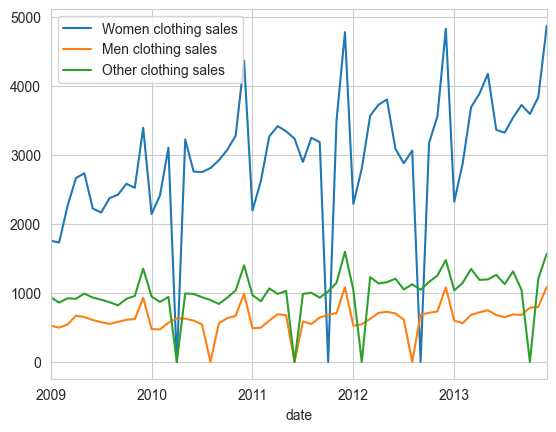

In [5]:
ax = women_clothing_df.plot(y='Sales(In ThousandDollars)', label='Women clothing sales')
men_clothing_df.plot(y='Sales(In ThousandDollars)', ax=ax, label='Men clothing sales')
other_clothing_df.plot(y='Sales(In ThousandDollars)', ax=ax, label='Other clothing sales')
plt.show()